# Step 1 — Import Libraries:

In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, f1_score




# Step 2 — Load Dataset:

In [4]:
data=pd.read_excel("Banking_Call_Data.xlsx")

# Step 3 — Explore Dataset:

In [6]:
data.info()

data['y'].value_counts()


<class 'pandas.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  str  
 2   marital    45211 non-null  str  
 3   education  45211 non-null  str  
 4   default    45211 non-null  str  
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  str  
 7   loan       45211 non-null  str  
 8   contact    45211 non-null  str  
 9   day        45211 non-null  int64
 10  month      45211 non-null  str  
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  str  
 16  y          45211 non-null  str  
dtypes: int64(7), str(10)
memory usage: 8.1 MB


y
no     39922
yes     5289
Name: count, dtype: int64

In [7]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
data.duplicated().sum()

0

# EDA:
    -Plot Target

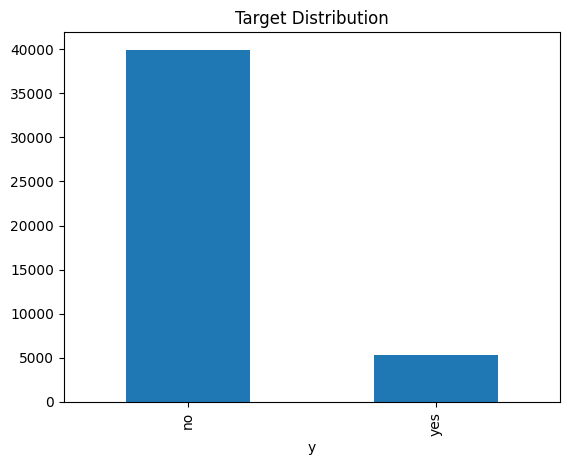

In [10]:
import matplotlib.pyplot as plt

data['y'].value_counts().plot(kind='bar')
plt.title("Target Distribution")
plt.show()


### Numerical Features Summary:

In [12]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Relationship Between Features & Target:

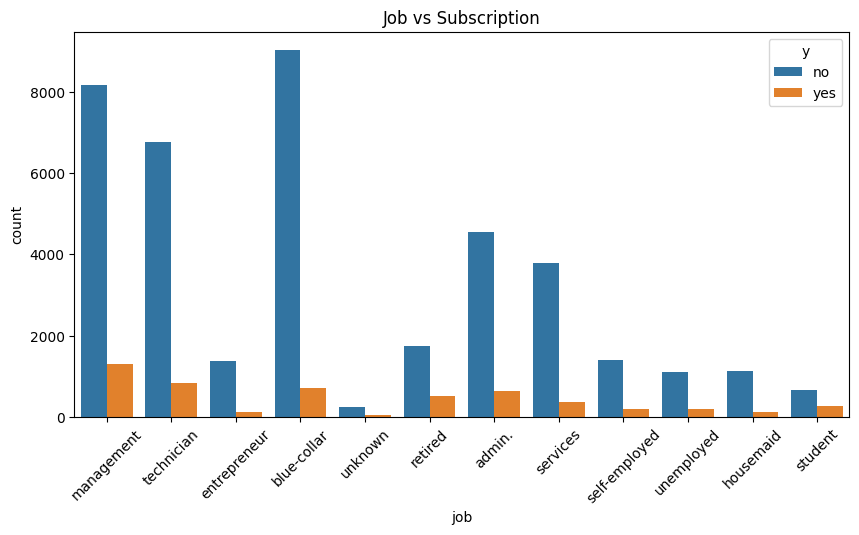

In [15]:
#job vs target
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='y', data=data)
plt.xticks(rotation=45)
plt.title("Job vs Subscription")
plt.show()


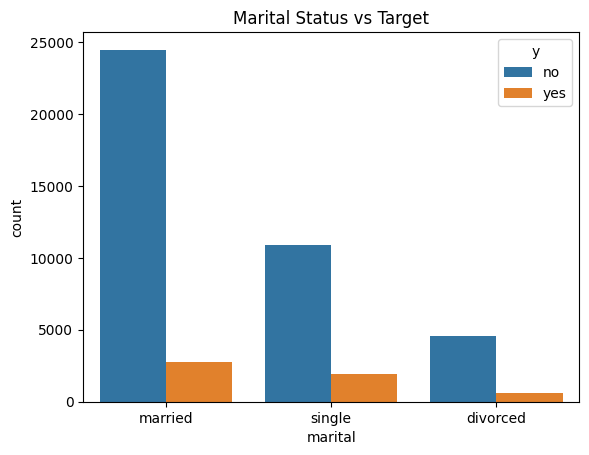

In [16]:
#Marital vs Target:
sns.countplot(x='marital', hue='y', data=data)
plt.title("Marital Status vs Target")
plt.show()


# Step 4 — Encode Categorical Features:

In [18]:
le = LabelEncoder()

categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


C:\Users\HP\AppData\Local\Temp\ipykernel_17572\30449250.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = data.select_dtypes(include=['object']).columns


In [19]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Step 5 — Define Features & Target:

In [21]:
X = data.drop("y", axis=1)
y = data["y"]


# Step 6 — Train Test Split:

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Step 7 — Train Models:

## Random Forest:

In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


# Step 8 — Model Evaluation:

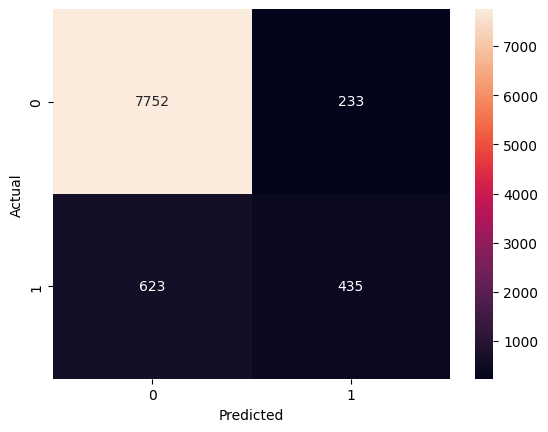

In [28]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.65      0.41      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.91      0.90      9043



### F1 Score:

In [31]:
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1)


F1 Score: 0.5040556199304751


### ROC Curve:

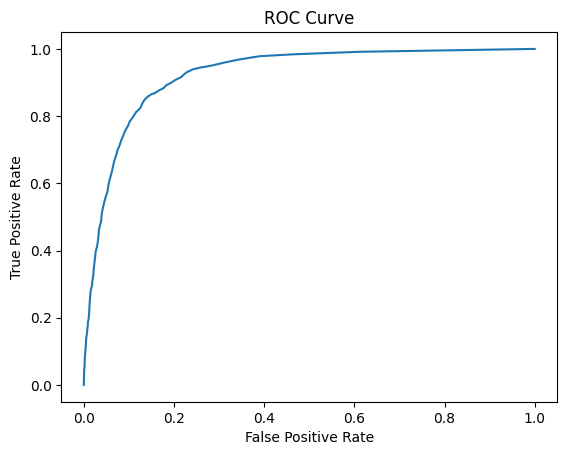

ROC AUC Score: 0.9235708967546663


In [33]:
y_prob = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


# Step 9 — Model Explainability (SHAP):

In [35]:
import shap 

### SHAP Implementation:

In [37]:
# # SHAP Explainer
# explainer = shap.TreeExplainer(rf_model)

# # Calculate SHAP values
# shap_values = explainer.shap_values(X_test)

In [38]:
# shap.summary_plot(shap_values[1], X_test)


In [39]:
# explainer = shap.Explainer(model, X_train)
# shap_values = explainer(X_sample)


In [40]:
X_sample = X_test.sample(200, random_state=42)


100%|===================| 399/400 [00:41<00:00]        

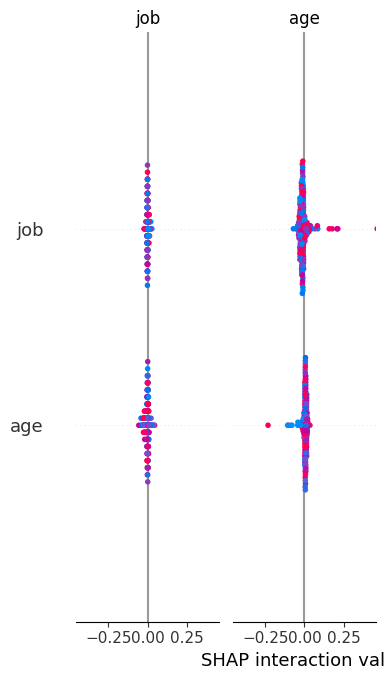

In [45]:
explainer = shap.Explainer(rf_model, X_train)

shap_values = explainer(X_sample)

shap.summary_plot(shap_values, X_sample)
